In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inLine
from apyori import apriori
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as st

In [2]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pyodbc
pyodbc.drivers()

['SQL Server',
 'SQL Server Native Client 11.0',
 'ODBC Driver 13 for SQL Server',
 'SQL Server Native Client RDA 11.0']

In [4]:
pip install mysql

In [5]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [6]:
conn = pyodbc.connect(
    Trusted_Connection='Yes',
    Driver='ODBC Driver 13 for SQL Server',
    Server='DESKTOP-8NHRDO2\SA',
    Database='rts'
)

cursor = conn.cursor()

In [7]:
#cursor.execute("SELECT * FROM rts.dbo.Iris")

In [8]:
df=pd.read_csv("Desktop/customerdata.csv")


C:\Users\AGL\AppData\Local\Temp\ipykernel_1688\4072823610.py:1: DtypeWarning: Columns (11,12,21,22,26,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Desktop/customerdata.csv")


In [11]:
cursor.execute("SELECT canonical_id FROM rts.dbo.cdp where created =date_of_purchase")

In [12]:
for row in cursor:
    print(row)

('THk7oPACqlnI', )
('K_zBp3SmA9_I', )
('CG5-KJrG90XI', )
('8pqH2l23LdjI', )
('gY4oW4__QUXI', )
('_4KjVzP5IbbI', )
('xwsof2kGYybI', )
('xI3xdFQOc3bI', )
('PUIjazK8hOrI', )
('O3EQk1-u6n7I', )
('FHm_TxHqbATI', )
('Hzki3gncabjI', )
('uHuAjRAyPJrI', )
('zHw-4hwoQ7jI', )
('c4vzjZtPHlzI', )
('ZUMEfVuojrPI', )
('ZJoIwZCYgADI', )
('gnUipVN2NwPI', )
('0mGxSH7w3eTI', )
('AM8yol_t-lDI', )
('wY_OXHhl1qrI', )
('gOn6KZ2MTizI', )
('ddJI9kbJCafI', )
('U3mIlZI32HXI', )
('U3mIlZI32HXI', )
('-tKyXpBr6vnI', )
('yclBwWE6X97I', )
('xzJflEIxZ_fI', )
('USSZMjCp7CrI', )
('Xr1gbiguan3I', )
('SuR4rGExjirI', )
('HDnWEidLfC3I', )
('J3-7gyqe0LLI', )
('G73q6_FM94TI', )
('e9dOQMOM10XI', )
('_7q36zIL4g_I', )
('y8dABxPgt93I', )
('4YIAnM_VzDvI', )
('VbWLJsSGzGLI', )
('dwFVG9-ibxvI', )
('2l2sgfNfynHI', )
('MxuOq1UKJR_I', )
('MhtTueEjv9rI', )
('D-fj3nwX3ejI', )
('naAqgHugw3_I', )
('hoVZMIrZ1PTI', )
('0qMtukjDuGzI', )
('i9L10Z4yj_bI', )
('xXVuu8e-x17I', )
('4dh1-Jcmb8DI', )
('uff4fUNoq07I', )
('5IR41C_ELoHI', )
('jBssXMqjHP

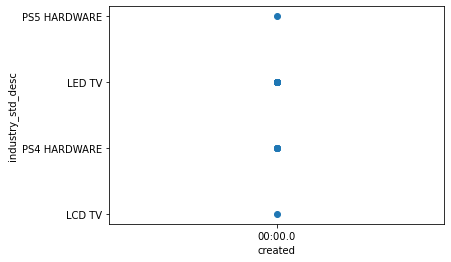

In [13]:
#ploting the overlap between feature
plt.scatter(df.head(20)['created'],df.head(20)['industry_std_desc'],)
plt.xlabel('created')
plt.ylabel('industry_std_desc')
plt.show()

In [14]:
#List of Customer purchased multiple product
cursor.execute("SELECT COUNT(product_hierarchy_tokyo_6d_4d),cdp_customer_id FROM rts.dbo.cdp GROUP BY cdp_customer_id HAVING COUNT(product_hierarchy_tokyo_6d_4d)  > 2 ")

In [15]:
for row in cursor:
    print(row)

(6, '0463c8e31553775f33065b2206bcb6b6e31644b0')
(5, '05393ff307b08f6180ccd5c6012b25f6d7d467e8')
(5, '0ebff50e2949776cdf1a683891936dc94ae53bd7')
(3, '0f4263afcb942391e449bb23f61d00de436d2097')
(3, '1174fc761d39599ce9dae0312d26717dce50b38a')
(3, '24504234e352d001a188e99f501c7578c5603072')
(3, '260782c28ffa0cace7cb7a56d7c49a0fef230b21')
(3, '2b4d2cd92268920dae910489a4e88dc4e9e05568')
(3, '2dda556d1ad4b33fb09138bc0a7f9524e3e3b130')
(3, '2ed454d1f957a4b7747f69328fd087479a02d293')
(4, '2fb5e8fa3d0c092c435e7dfc4d1fb954a232f9be')
(5, '3211b33371b7f74dc2418e0821daf1d8cafb0887')
(4, '375bb4b47962e88b8a0ef5d4d8819bdd52891ee8')
(3, '3902692b4eba515f57fa438e983c07786fd0c1fb')
(3, '3debfd0f387951386e4d5f6f734690031d3f32fa')
(5, '3ffec63a3e9753754fe2704659bf046ad2ec370a')
(3, '40c78658b018884cad1b8e1c5f60c07ec8d26888')
(5, '4aa02fbe2f335bb1e79001afd45f0d59a393b1e6')
(7, '4d1af6ec56415014d442318747f034f382e1ba80')
(3, '4e8bafcc5bb1cc20bcd6884c7839b466d582d017')
(3, '512fbb64b4360ef5406e9f9289852ed22fb

In [16]:
#list of Customer purchased multiple product after making a specific call like installation request
cursor.execute("SELECT cdp_customer_id,call_type FROM rts.dbo.cdp where call_type='Installation' AND cdp_customer_id in (SELECT cdp_customer_id FROM rts.dbo.cdp GROUP BY cdp_customer_id HAVING COUNT(product_hierarchy_tokyo_6d_4d) > 2 )")

In [17]:
for row in cursor:
    print(row)

('0ebff50e2949776cdf1a683891936dc94ae53bd7', 'Installation')
('0f4263afcb942391e449bb23f61d00de436d2097', 'Installation')
('1174fc761d39599ce9dae0312d26717dce50b38a', 'Installation')
('1174fc761d39599ce9dae0312d26717dce50b38a', 'Installation')
('260782c28ffa0cace7cb7a56d7c49a0fef230b21', 'Installation')
('260782c28ffa0cace7cb7a56d7c49a0fef230b21', 'Installation')
('260782c28ffa0cace7cb7a56d7c49a0fef230b21', 'Installation')
('2fb5e8fa3d0c092c435e7dfc4d1fb954a232f9be', 'Installation')
('375bb4b47962e88b8a0ef5d4d8819bdd52891ee8', 'Installation')
('3902692b4eba515f57fa438e983c07786fd0c1fb', 'Installation')
('3ffec63a3e9753754fe2704659bf046ad2ec370a', 'Installation')
('40c78658b018884cad1b8e1c5f60c07ec8d26888', 'Installation')
('4d1af6ec56415014d442318747f034f382e1ba80', 'Installation')
('4d1af6ec56415014d442318747f034f382e1ba80', 'Installation')
('512fbb64b4360ef5406e9f9289852ed22fbec69b', 'Installation')
('5558099eab977b0143751ccecf0f87c8bcf608e6', 'Installation')
('5a177df5b5891b6c4f7a03

In [18]:
#List of Customer purchase multiple product after one product got "no warranty status"
cursor.execute("SELECT cdp_customer_id,is_it_under_warranty FROM rts.dbo.cdp where is_it_under_warranty='No' AND cdp_customer_id in (SELECT cdp_customer_id FROM rts.dbo.cdp GROUP BY cdp_customer_id HAVING COUNT(product_hierarchy_tokyo_6d_4d) > 2 )")

In [19]:
for row in cursor:
    print(row)

('0463c8e31553775f33065b2206bcb6b6e31644b0', 'No')
('0463c8e31553775f33065b2206bcb6b6e31644b0', 'No')
('0463c8e31553775f33065b2206bcb6b6e31644b0', 'No')
('0463c8e31553775f33065b2206bcb6b6e31644b0', 'No')
('0463c8e31553775f33065b2206bcb6b6e31644b0', 'No')
('05393ff307b08f6180ccd5c6012b25f6d7d467e8', 'No')
('0ebff50e2949776cdf1a683891936dc94ae53bd7', 'No')
('0ebff50e2949776cdf1a683891936dc94ae53bd7', 'No')
('0ebff50e2949776cdf1a683891936dc94ae53bd7', 'No')
('0ebff50e2949776cdf1a683891936dc94ae53bd7', 'No')
('2ed454d1f957a4b7747f69328fd087479a02d293', 'No')
('3211b33371b7f74dc2418e0821daf1d8cafb0887', 'No')
('3211b33371b7f74dc2418e0821daf1d8cafb0887', 'No')
('375bb4b47962e88b8a0ef5d4d8819bdd52891ee8', 'No')
('3debfd0f387951386e4d5f6f734690031d3f32fa', 'No')
('3debfd0f387951386e4d5f6f734690031d3f32fa', 'No')
('4aa02fbe2f335bb1e79001afd45f0d59a393b1e6', 'No')
('4d1af6ec56415014d442318747f034f382e1ba80', 'No')
('4d1af6ec56415014d442318747f034f382e1ba80', 'No')
('4d1af6ec56415014d442318747f03

In [20]:
#grouping the dataset
final=df.groupby(['contact_name','material',]).size().reset_index().head(50)

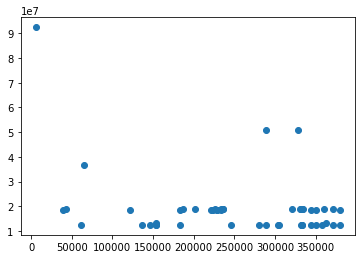

In [21]:
#ploting on x and y axis
plt.scatter(final['contact_name'],final['material'])
plt.show()

In [22]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [23]:

y_predicted = km.fit_predict(final[['contact_name','material']])
y_predicted                                     

array([1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [24]:
final['cluster']=y_predicted
final.head(20)

,contact_name,material,0,cluster
0,5606,92479881.0,1,1
1,39608,18540601.0,6,0
2,43303,18932701.0,1,0
3,61341,12468401.0,2,0
4,64564,36620988.0,1,2
5,121223,18413300.0,1,0
6,136841,12468001.0,2,0
7,146665,12487401.0,1,0
8,153109,12486501.0,2,0
9,154190,12448401.0,2,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


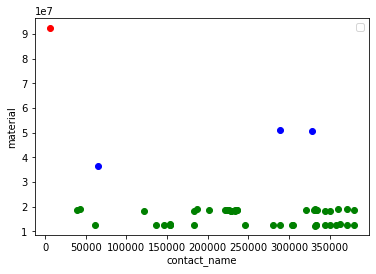

In [25]:
#after training model ploting into 3 cluster or group
f1 = final[final.cluster==0]
f2 = final[final.cluster==1]
f3 = final[final.cluster==2]

plt.scatter(f1.contact_name,f1['material'],color='green')
plt.scatter(f2.contact_name,f2['material'],color='red')
plt.scatter(f3.contact_name,f3['material'],color='blue')

plt.xlabel('contact_name')
plt.ylabel('material')
plt.legend()

In [26]:
#scaling to get more accurate output
scaler = MinMaxScaler()
scaler.fit(final[['material']])
final['material'] = scaler.transform(final['material'])

scaler.fit(final.contact_name)
final.contact_name = scaler.transform(final.contact_name)
final

C:\Users\AGL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[92479881. 18540601. 18932701. 12468401. 36620988. 18413300. 12468001.
 12487401. 12486501. 12448401. 13068681. 12442401. 18287301. 18948901.
 18798901. 18540201. 18637001. 18745201. 18470701. 18492401. 18342601.
 18727001. 18871401. 18872901. 12468401. 12485501. 12449001. 50973573.
 12468401. 12442401. 18783001. 50667000. 18874601. 12425101. 18940601.
 18871101. 12442301. 12468001. 18871101. 12467601. 18308601. 12485601.
 18342400. 12442301. 18996701. 13069681. 12485301. 18948001. 12467601.
 18617701.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [27]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(final[['contact_name','material']])
y_predicted

array([2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [28]:
final['cluster'] = y_predicted
final.drop('cluster', axis='columns',inplace=True)
final

,contact_name,material,0
0,5606,92479881.0,1
1,39608,18540601.0,6
2,43303,18932701.0,1
3,61341,12468401.0,2
4,64564,36620988.0,1
5,121223,18413300.0,1
6,136841,12468001.0,2
7,146665,12487401.0,1
8,153109,12486501.0,2
9,154190,12448401.0,2


In [29]:
#ploting the output after rescaling according to need
f1 = final[final.cluster==0]
f2 = final[final.cluster==1]
f3 = final[final.cluster==2]

plt.scatter(f1.contact_name,f1['material'],color='green')
plt.scatter(f2.contact_name,f2['material'],color='red')
plt.scatter(f3.contact_name,f3['material'],color='blue')

plt.xlabel('contact_name')
plt.ylabel('material')
plt.legend()

AttributeError: 'DataFrame' object has no attribute 'cluster'

In [47]:
#finding the duration between purchasing dates of more than 2 model for a customer
cursor.execute("SELECT COUNT(model),date_of_purchase FROM rts.dbo.cdp GROUP BY date_of_purchase HAVING COUNT(model)  > 2 ")

In [48]:
for row in cursor:
    print(row)

(534, None)
(3, datetime.datetime(2013, 8, 27, 0, 0))
(3, datetime.datetime(2016, 1, 13, 0, 0))
(3, datetime.datetime(2016, 1, 20, 0, 0))
(4, datetime.datetime(2017, 1, 11, 0, 0))
(3, datetime.datetime(2017, 1, 19, 0, 0))
(4, datetime.datetime(2017, 1, 25, 0, 0))
(3, datetime.datetime(2021, 8, 15, 0, 0))
(3, datetime.datetime(2021, 11, 1, 0, 0))
(3, datetime.datetime(2021, 11, 2, 0, 0))
(3, datetime.datetime(2021, 12, 30, 0, 0))
(9, datetime.datetime(2021, 12, 31, 0, 0))
(12, datetime.datetime(2022, 1, 1, 0, 0))
(3, datetime.datetime(2022, 1, 2, 0, 0))
(7, datetime.datetime(2022, 1, 3, 0, 0))
(8, datetime.datetime(2022, 1, 4, 0, 0))
(4, datetime.datetime(2022, 1, 5, 0, 0))
(5, datetime.datetime(2022, 1, 7, 0, 0))
(7, datetime.datetime(2022, 1, 8, 0, 0))
(8, datetime.datetime(2022, 1, 9, 0, 0))
(7, datetime.datetime(2022, 1, 10, 0, 0))
(7, datetime.datetime(2022, 1, 11, 0, 0))
(8, datetime.datetime(2022, 1, 12, 0, 0))
(7, datetime.datetime(2022, 1, 13, 0, 0))
(8, datetime.datetime(2022,

In [66]:
#Return the difference between two date values, in hours:
cursor.execute("SELECT DATEDIFF(hour, '2013/8/27 12:00', '2022/1/30  12:00') AS DateDiff")

In [67]:
for row in cursor:
    print(row)

(73872, )
